# Rotational Mixing of Nitrogen

Figure 10.5 from Chapter 10 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge 
University Press.

Plot of the surface mass fraction of <sup>14</sup>N as a function of age for non-rotating and rotating stars.
Data are from MESA solar-abundance models computed by the authors.

In [1]:
%matplotlib inline

import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig10_5.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Stellar rotational mixing data

Data from MESA solar-abundance models run by the authors.

Convert ages in years from MESA into Myr as per the convention in this book.

In [3]:
dataDir = 'RotationalMixing'
masses = [3,10,30]

ageRot = {}
X14Rot = {}
ageNon = {}
X14Non = {}

for mass in masses:   
    data = pd.read_csv(f'{dataDir}/nonRot_{mass}Msun.csv')
    ageNon[mass] = np.array(data['Age'])/1.0e6
    X14Non[mass] = np.array(data['14Nsurf'])
    data = pd.read_csv(f'{dataDir}/rot_{mass}Msun.csv')
    ageRot[mass] = np.array(data['Age'])/1.0e6
    X14Rot[mass] = np.array(data['14Nsurf'])

# plotting limits

minAge = 0.1   # Myr
maxAge = 1000.

minX14 = 5.0e-4
maxX14 = 1.0e-2

### Figure 10.5

Plot and annotate with the stellar masses.

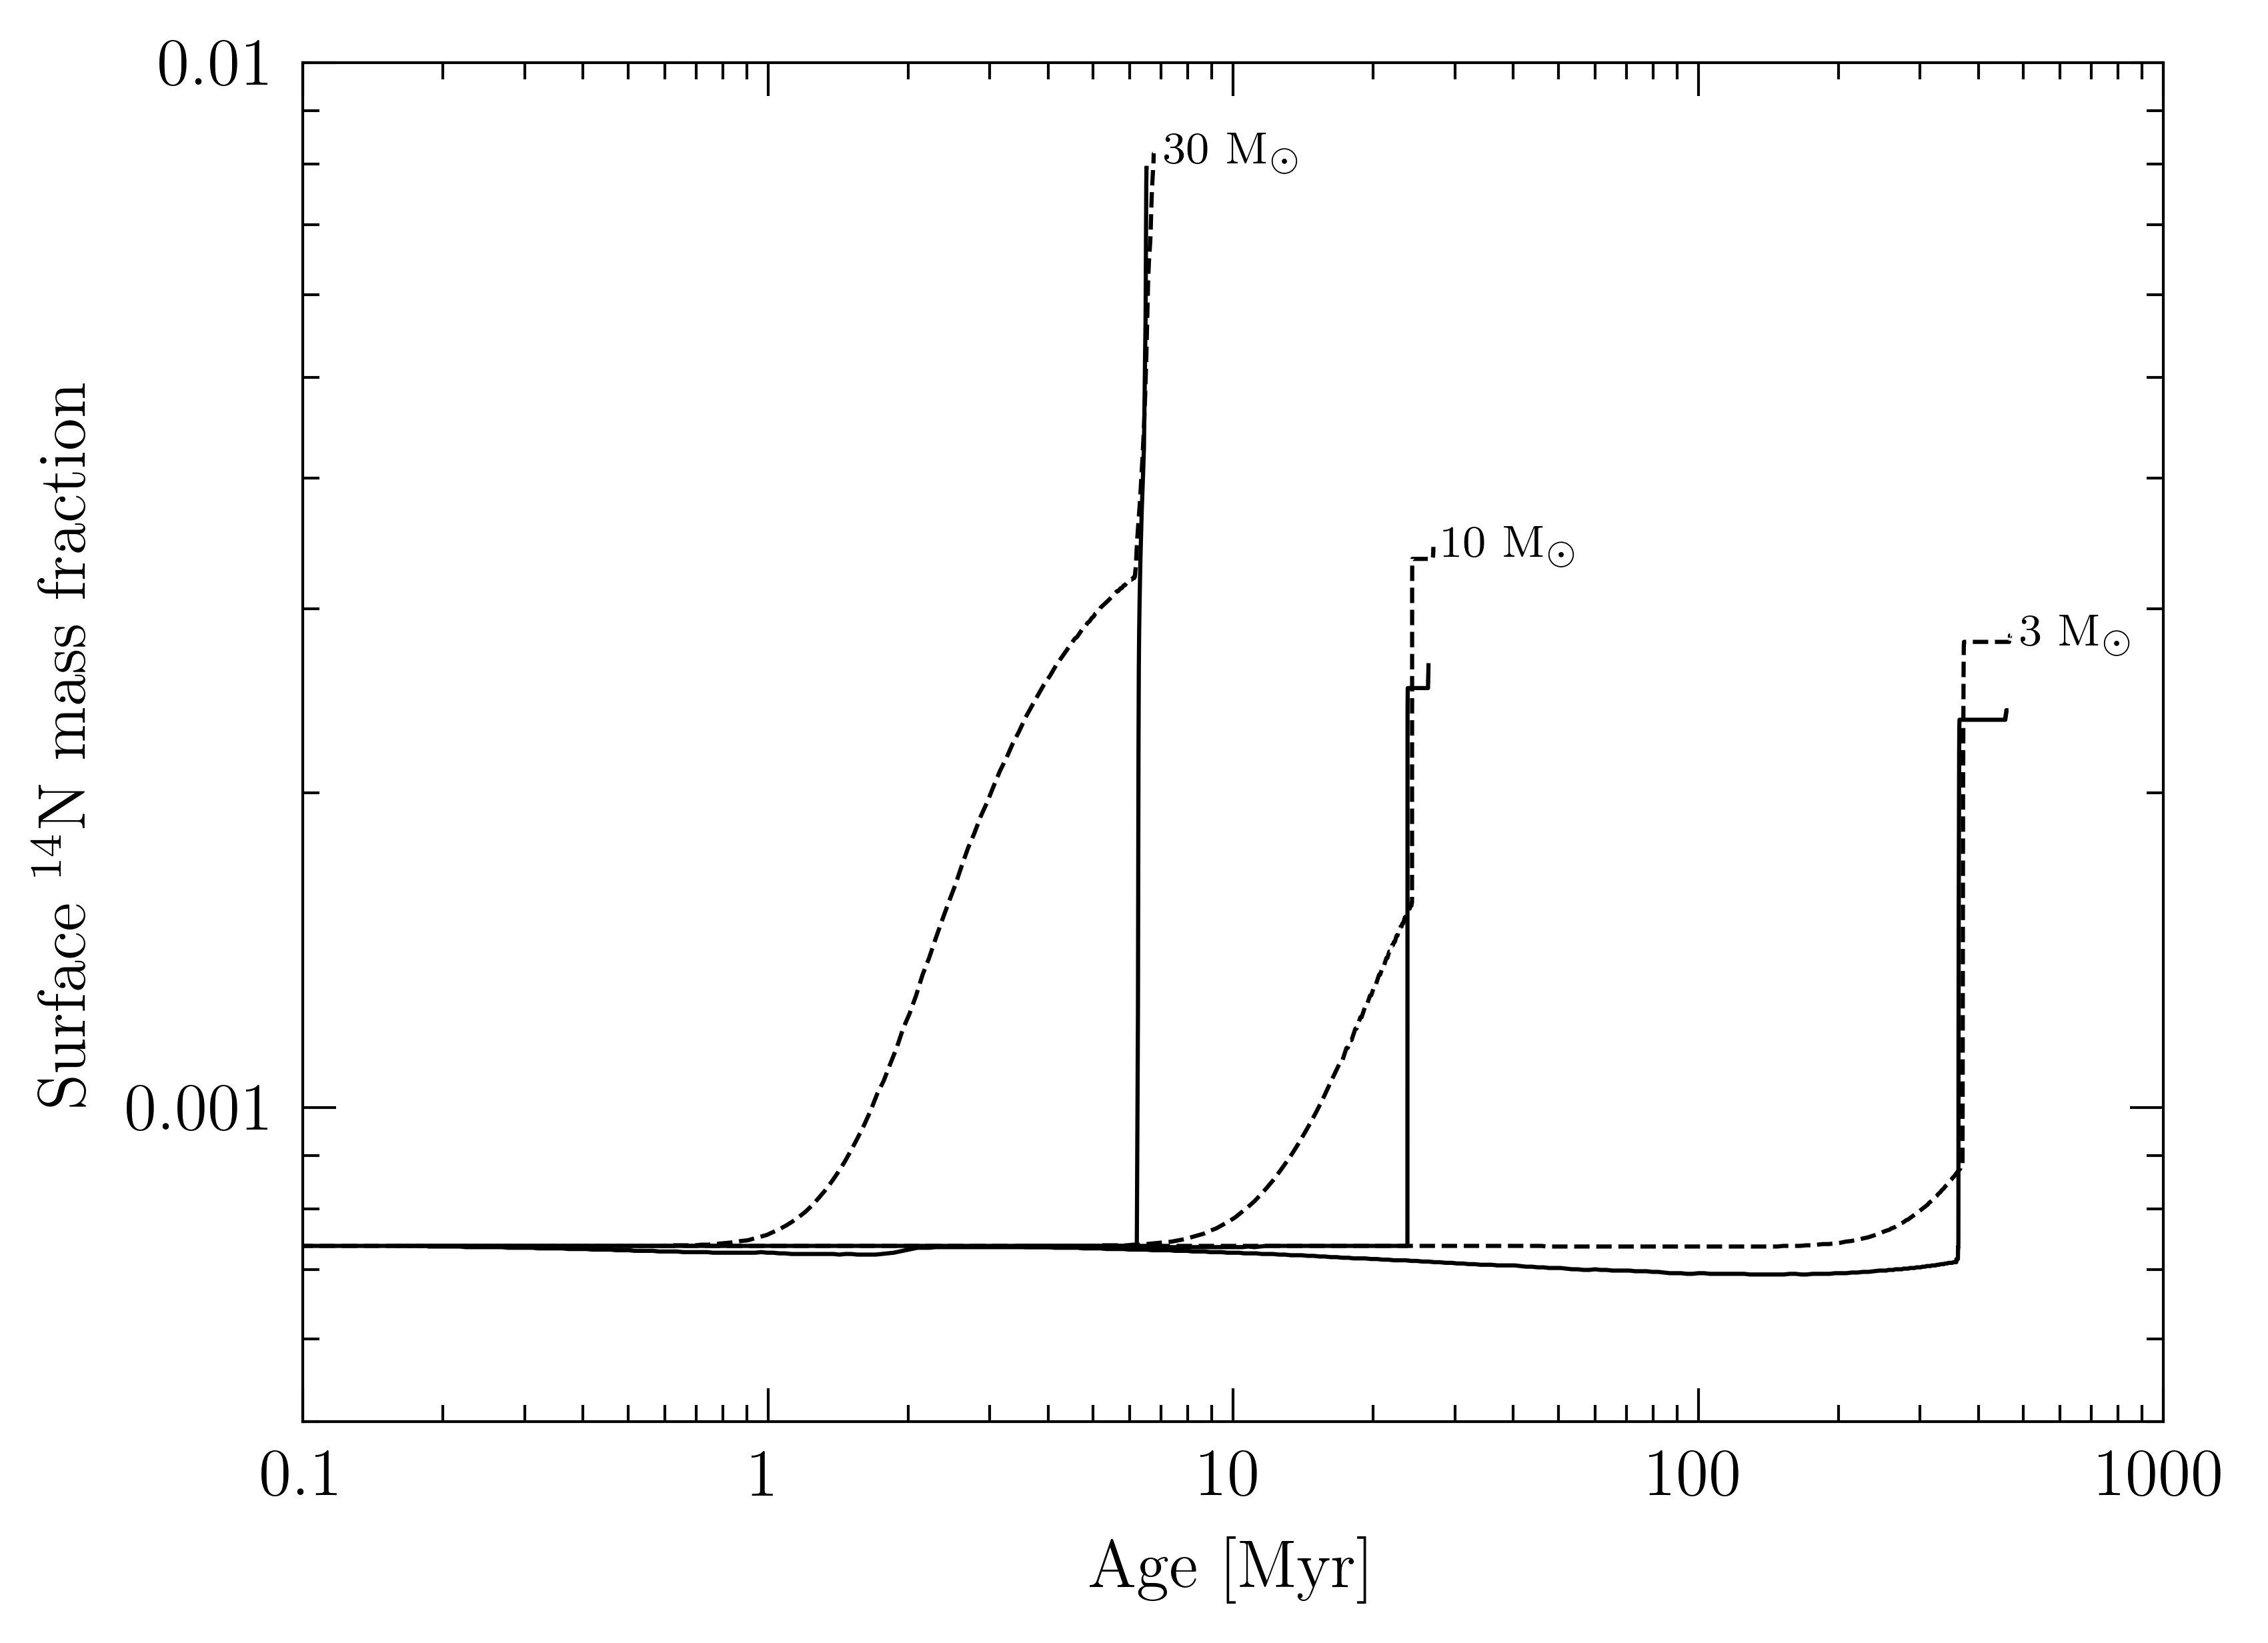

In [4]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

ax.set_xlim(minAge,maxAge)
ax.set_xscale('log')
ax.set_xticks([0.1,1,10,100,1000])
ax.set_xticklabels(['0.1','1','10','100','1000'])
ax.set_xlabel(r'Age [Myr]',fontsize=axisFontSize)
ax.set_ylim(minX14,maxX14)
ax.set_yscale('log')
ax.set_yticks([0.001,0.01])
ax.set_yticklabels(['0.001','0.01'])
ax.set_ylabel(r'Surface $^{14}$N mass fraction',fontsize=axisFontSize)

for mass in masses:
    ax.plot(ageNon[mass],X14Non[mass],'-',lw=0.75,color='black',zorder=10)
    ax.plot(ageRot[mass],X14Rot[mass],'--',lw=0.75,color='black',zorder=10)
    ax.text(1.05*np.max(ageRot[mass]),np.max(X14Rot[mass]),rf'{mass} M$_\odot$',
            fontsize=labelFontSize,va='center',ha='left')
    
plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')